#                        Naive Bayes on Piama Diabetes Dataset

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

#to test for normality
from scipy.stats import shapiro

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [5]:
#read dataset
piama_dataset=pd.read_csv('pima-indians-diabetes.csv')

In [7]:
#zero's are present in some of the independent attributes,practically which should not be the case
piama_dataset.head(30)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
#no null values
piama_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#skewness is present in the distribution of independent attributes
piama_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
# Let us look at the target column  'class' to understand how the data is distributed amongst the various values
piama_dataset.groupby(["class"]).count()

#We have class imbalance here. Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [13]:
zero_counts=(piama_dataset == 0.0).astype(int).sum(axis=0)

In [14]:
#number of zero's present in independent attributes
pd.DataFrame(zero_counts[0:-1]).transpose()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,111,5,35,227,374,11,0,0


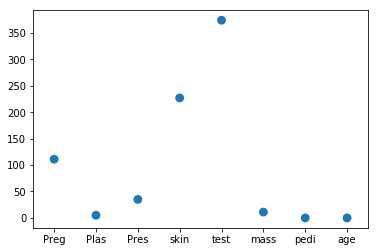

In [15]:
#Plotting number of zeros in independent attributes.Pregnancy can have zero values. For columns Plas,Pres,mass,skin and test,
#have zero values which should not be the case and can be considered as missing data . Zero values in skin and test are 
#considerably high.

sns.pointplot(y=list(zero_counts.values)[0:-1],x=list(zero_counts.index)[0:-1],join=False)

In [16]:
# Let us check whether any of the columns has any value other than numeric
piama_dataset[~piama_dataset.applymap(np.isreal).all(1)]
#only numeric values are present

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [17]:
#piama_dataset = piama_dataset.fillna(piama_dataset.mean())

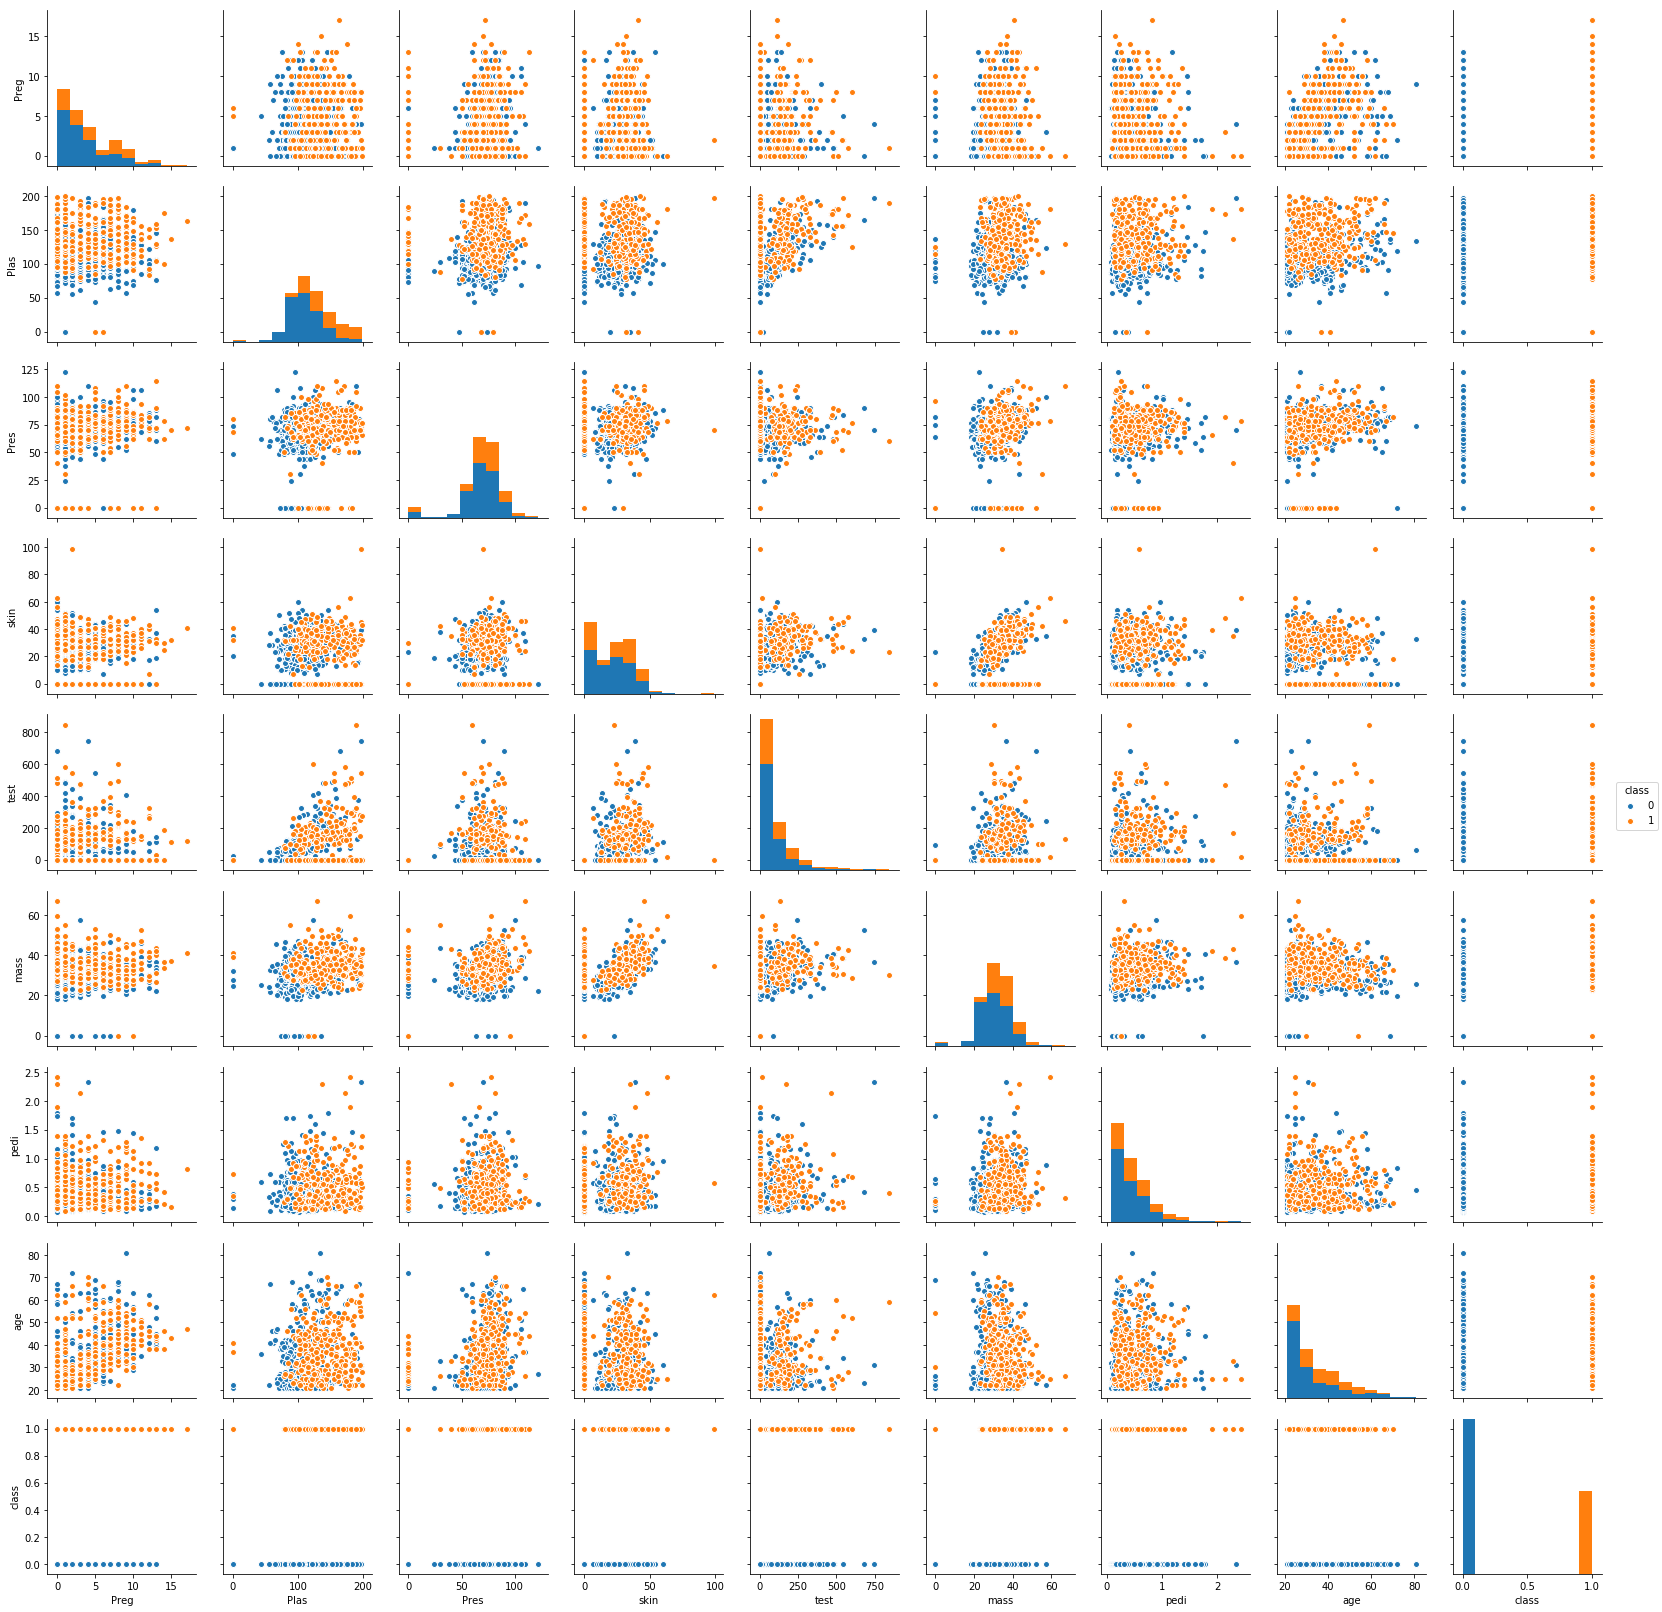

In [18]:
sns.pairplot(piama_dataset,hue='class')

In [19]:
#out of other independent attributes, mass is the only column which is some what following normal distribution. While rest doesn't follows.
#Also from the above pair plot very low corelation exists between independent variables.

In [20]:
#lets verify the test of normality using shapiro test
for col in piama_dataset.columns[0:-1]:
    #print(type(piama_dataset[col]))
    print('Shapiro test result for {} columns is {}'.format(col,shapiro(piama_dataset[col])))
    
# As seen that for all the columns, we have to reject the null hypothesis and accept alternative hypothesis that independent attributes
#doesn't follows normal distribution

Shapiro test result for Preg columns is (0.9042782783508301, 1.6080885881590613e-21)
Shapiro test result for Plas columns is (0.9701042175292969, 1.9867612763291298e-11)
Shapiro test result for Pres columns is (0.8189212083816528, 1.5840069624449098e-28)
Shapiro test result for skin columns is (0.90462726354599, 1.75157635361056e-21)
Shapiro test result for test columns is (0.7220207452774048, 7.915248149269491e-34)
Shapiro test result for mass columns is (0.9499887824058533, 1.8405621485603632e-15)
Shapiro test result for pedi columns is (0.8365186452865601, 2.477696547502535e-27)
Shapiro test result for age columns is (0.8747662305831909, 2.401946561183188e-24)


In [21]:

#calculate corelation between attributes
corelation=piama_dataset.corr()

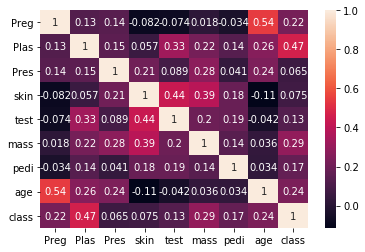

In [23]:
#plotting corelation on heatmap
#from the below heatmap we can see, there is less corelation between independent variable
sns.heatmap(corelation,annot=True)

In [26]:
#separate features and labels
X=piama_dataset.iloc[:,0:8]
y=piama_dataset.iloc[:,8]

In [27]:
#split train and test data
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=2)

In [28]:
#create and train model
model=GaussianNB()
model.fit(X_train,y_train)


GaussianNB(priors=None)

In [29]:
#predict results
y_predic=model.predict(X_test)

In [30]:
#calculate accuracy score
print(accuracy_score(y_test,y_predic))

0.7705627705627706


In [33]:
#Accuracy score is 77.05% which is not as per satisfaction. As we have class imbalance problem and missing values in dataset,
# accuracy of the model was supposed to be affected

In [34]:
print(metrics.confusion_matrix(y_test, y_predic))

[[136  19]
 [ 34  42]]


In [35]:
#As we can see from the above confusion matrix, out of 155 samples belonging to class 0, 136 were correctly predicted by model
#and out of 76 belonging to class 1, 42 were correctly predicted by the model

In [36]:
print(metrics.classification_report(y_test, y_predic))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84       155
          1       0.69      0.55      0.61        76

avg / total       0.76      0.77      0.76       231



In [37]:
#As we can see from the above classification report table, prediction for class 0  with the test set gives satisfactory 
# precision and recall values.
#In case of test samples for predictions belonginng to class 1, precision and recall values are low and not satisfactory.
# and this was about to happen as in the dataset which was provided to us, we have less records for class 1 (class imbalance problem)

In [39]:
#Hence by gathering more data and having proper class balance in dataset, 
#model performance can still be improved

In [40]:
#Tested accuracy score by replacing 0 values were ever required with the median.It gives the same accuracy score